In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import sqlite3

In [2]:
#SHOWING ALL THE TABLES INCLUDED IN THE CHINOOK DATABASE

conn=sqlite3.connect("Guided Project_ Answering Business Questions using SQL/chinook.db")
query="select * from sqlite_master where type='table';"
pd.read_sql_query(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


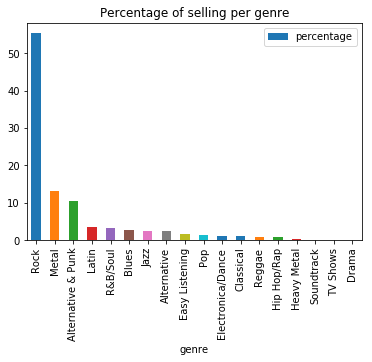

,invoice_id,track_id,track_name,genre,quantity,percentage
0,614,2663,Message in a Bottle (new classic rock mix),Rock,2635,55.39
1,613,1126,Re-Align,Metal,619,13.01
2,609,2603,Hitsville UK,Alternative & Punk,492,10.34
3,610,1091,Refavela (Live),Latin,167,3.51
4,613,3465,You Know I'm No Good (feat. Ghostface Killah),R&B/Soul,159,3.34


In [119]:
#ANALYZING THE PERCENTAGES OF THE SALES PER GENRE

query1='select il.invoice_id, il.track_id, tr.name as track_name, gn.name as genre, SUM(il.quantity) as quantity from invoice_line as il inner join track as tr on tr.track_id=il.track_id inner join genre as gn on gn.genre_id=tr.genre_id group by gn.name order by quantity desc'
sold_genres=conn.execute(query1).fetchall()
sold_genres=pd.DataFrame(sold_genres)
sold_genres.columns=['invoice_id','track_id','track_name','genre', 'quantity']
sold_genres['percentage']=round((sold_genres['quantity']/sold_genres['quantity'].sum())*100,2)

sold_genres.plot.bar(x='genre', y='percentage', title='Percentage of selling per genre')
plt.show()
sold_genres.head()

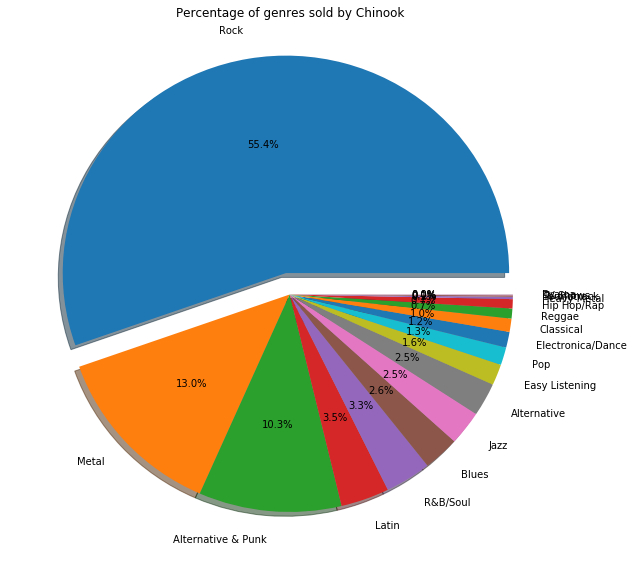

In [118]:
fig=plt.figure(figsize=(10,10))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
ax=fig.add_subplot(1,1,1)
ax.pie(sold_genres['percentage'],labels=sold_genres['genre'],labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
ax.set_title('Percentage of genres sold by Chinook')
plt.show()

From the bar chart and the pie chart above it appears evident that the most sold music genre is Rock with over 55% of the track sold. The next two most sold music genres are Metal and Alternative & Punk with, respectively, 13 and 10%.
Regarding the new artist whose album should be added to our sale list, I would raccomend to avoid selling the Hip-Hop album since the sales of that genre represent just the 0.7% while Punk, Pop and Blues appear to have a broader market available with, respectively, the 10, 1.3 and 2.6% of the sellings.

In [4]:
#ANALYZING THE EMPLOYEES PERFORMANCE WITH A PARTICULAR ATTENTION TO THE SALES SUPPORT AGENTS

query2='select em1.employee_id, em1.first_name||" "||em1.last_name as employee_name, em1.title, em2.employee_id as supervisor_id, em2.first_name||" "||em2.last_name as supervisor_name, SUM(iv.total) as total_sold from employee as em1 left join employee as em2 on em1.reports_to=em2.employee_id left join customer as cu on cu.support_rep_id=em1.employee_id left join invoice as iv on iv.customer_id=cu.customer_id group by employee_name order by total_sold desc;'
employees_superv=pd.read_sql_query(query2,conn)
employees_superv

,employee_id,employee_name,title,supervisor_id,supervisor_name,total_sold
0,3,Jane Peacock,Sales Support Agent,2.0,Nancy Edwards,1731.51
1,4,Margaret Park,Sales Support Agent,2.0,Nancy Edwards,1584.00
2,5,Steve Johnson,Sales Support Agent,2.0,Nancy Edwards,1393.92
3,1,Andrew Adams,General Manager,NaN,None,NaN
4,8,Laura Callahan,IT Staff,6.0,Michael Mitchell,NaN
5,6,Michael Mitchell,IT Manager,1.0,Andrew Adams,NaN
6,2,Nancy Edwards,Sales Manager,1.0,Andrew Adams,NaN
7,7,Robert King,IT Staff,6.0,Michael Mitchell,NaN


So it appears that among the "Sales Support Agents", whose supervisor is Nancy Edwards (the Sales Manager), the one who sold the most is Jane Peacock with 1731 USD, followed by Margaret Park with 1584 USD and Steve Johnson with 1393 USD. The other employees are the ones workin in the IT department and finally there's the General Manager Andrew Adams which has no supervisor.

In [5]:
#ANALYZING THE AMOUNT SPENT BY DIFFERENT CUSTOMERS GROUPED BY NATION

query3='select cu.first_name||" "||cu.last_name as customer_name, cu.country, sum(iv.total) as total_purchased from customer as cu left join invoice as iv on iv.customer_id=cu.customer_id left join invoice_line as il on il.invoice_id=iv.invoice_id group by 2,1 order by 2 limit 10;'
cust_country=pd.read_sql_query(query3,conn)
cust_country

,customer_name,country,total_purchased
0,Diego Gutiérrez,Argentina,396.00
1,Mark Taylor,Australia,940.50
2,Astrid Gruber,Austria,649.44
3,Daan Peeters,Belgium,567.27
4,Alexandre Rocha,Brazil,619.74
5,Eduardo Martins,Brazil,410.85
6,Fernanda Ramos,Brazil,1025.64
7,Luís Gonçalves,Brazil,1182.06
8,Roberto Almeida,Brazil,820.71
9,Aaron Mitchell,Canada,862.29


In [8]:
#ANALYZING THE TOTAL NUMBER OF CLIENTS PER NATION WITH THE TOTAL AMOUNT SPENT AND THE AVERAGE PURCHASE

query4='select country, count(customer_name) as nm_clients, sum(total_purchased) as total_purchased, round((sum(total_purchased)/count(customer_name)),1) as average_sale, CASE WHEN count(customer_name)=1 THEN "other" ELSE "a" END as sort from (select cu.first_name||" "||cu.last_name as customer_name, cu.country, sum(iv.total) as total_purchased from customer as cu left join invoice as iv on iv.customer_id=cu.customer_id left join invoice_line as il on il.invoice_id=iv.invoice_id group by 2,1 order by 2) group by country order by total_purchased desc;'
cust_country2=pd.read_sql_query(query4,conn)
cust_country2

,country,nm_clients,total_purchased,average_sale,sort
0,USA,13,10405.89,800.5,a
1,Canada,8,5489.55,686.2,a
2,Brazil,5,4059.00,811.8,a
3,France,5,3972.87,794.6,a
4,Germany,4,3441.24,860.3,a
5,Czech Republic,2,3183.84,1591.9,a
6,United Kingdom,3,2498.76,832.9,a
7,India,2,1887.93,944.0,a
8,Portugal,2,1755.27,877.6,a
9,Ireland,1,1433.52,1433.5,other


So it appears that the country with the highest number of clients is USA with 13 clients and more than 10k USD spent, with an average purchase of 800 USD. Many countries (15) appear to have just one client and moreover Denmark is the last country in our chart having its only client spent just 196 USD.

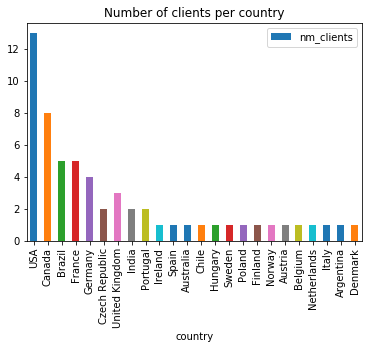

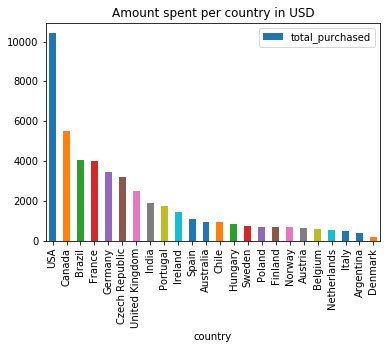

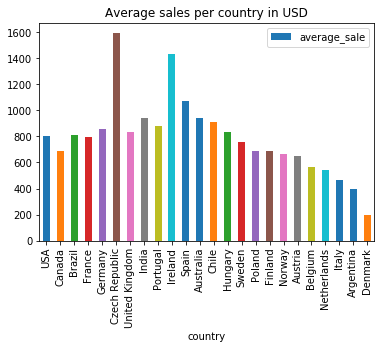

In [16]:
cust_country2.plot.bar(x='country', y='nm_clients', title="Number of clients per country", orientation='vertical')
cust_country2.plot.bar(x='country', y='total_purchased', title="Amount spent per country in USD" )
cust_country2.plot.bar(x='country', y='average_sale', title="Average sales per country in USD")
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


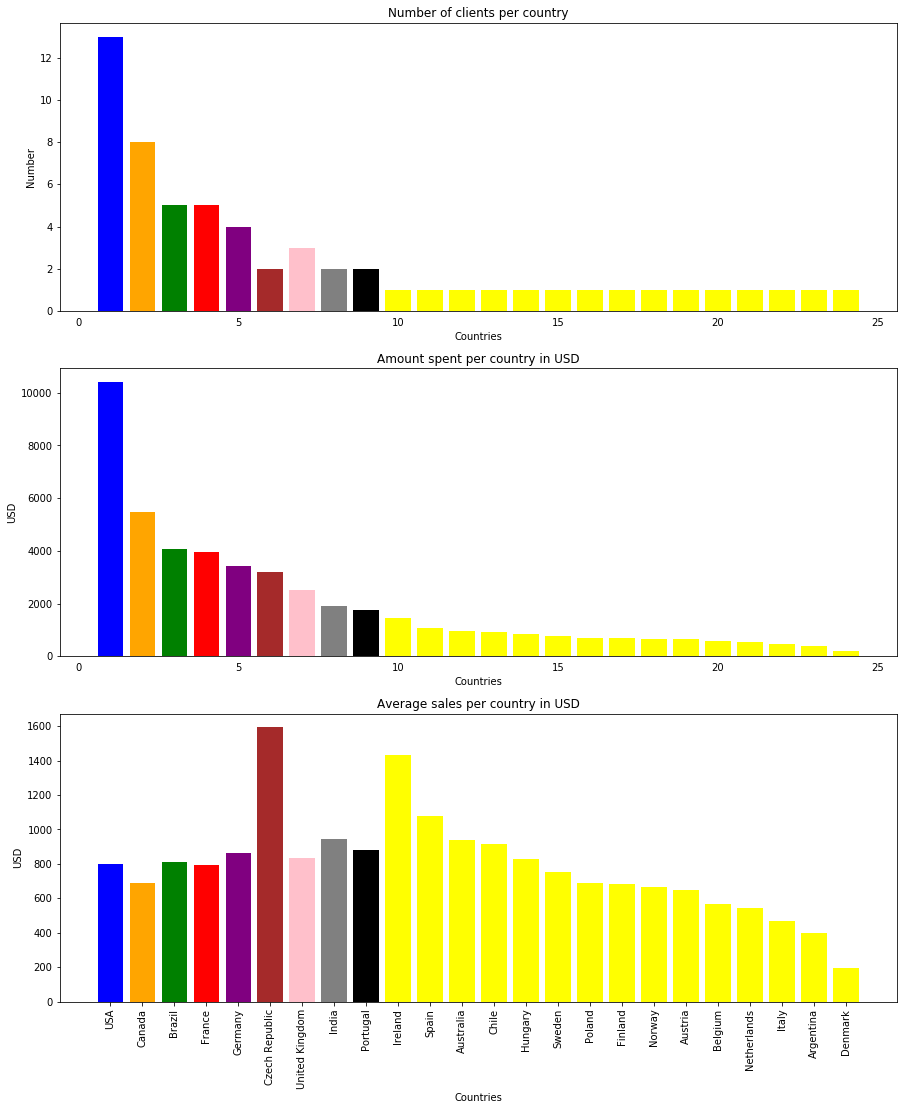

In [53]:
#CREATING THE SAME BAR PLOTS AS ABOVE BUT USING FIGURES AND AXES

from numpy import arange
import matplotlib.cm as cm

colors = ['blue','orange','green','red', 'purple','brown','pink', 'grey','black','yellow','yellow','yellow','yellow','yellow','yellow','yellow','yellow','yellow','yellow','yellow','yellow','yellow','yellow','yellow']


fig=plt.figure(figsize=(15,18))
bar_positions=arange(24)+1
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
ax1.bar(bar_positions,cust_country2['nm_clients'],width=0.8, color=colors)
ax1.tick_params(bottom='off')
#ax1.set_xticks(range(1,25))
#ax1.set_xticklabels(cust_country2['country'], rotation='vertical')
ax1.set_xlabel('Countries')
ax1.set_ylabel('Number')
ax1.set_title('Number of clients per country')

ax2.bar(bar_positions,cust_country2['total_purchased'], color=colors)
ax2.tick_params(bottom='off')
#ax2.set_xticks(range(1,25))
#ax2.set_xticklabels(cust_country2['country'], rotation='vertical')
ax2.set_xlabel('Countries')
ax2.set_ylabel('USD')
ax2.set_title('Amount spent per country in USD')

ax3.bar(bar_positions,cust_country2['average_sale'], color=colors)
ax3.set_xticks(range(1,25))
ax3.set_xticklabels(cust_country2['country'], rotation='vertical')
ax3.set_xlabel('Countries')
ax3.set_ylabel('USD')
ax3.set_title('Average sales per country in USD')

plt.show()

There's something particular which is worth to point out and it is that even though many countries have just one client that doesn't mean that their average purchase is lower than the countries with many more clients as it appears evident from the last bar chart regardin countries like Ireland, Spain, Australia and Chile that have an average purchase higher than UK and Canada (having, respectively, 3 and 8 clients).

In [6]:
#ANALYZING WHAT IS THE PERCENTAGE OF AN ALBUM BOUGHT BY EVERY SINGLE CUSTOMER IN EVERY DIFFERENT PURCHASE


query6="select il.invoice_id, il.track_id, tr.name, tr.album_id, al.title, count(tr.album_id) as count, CASE WHEN count(tr.album_id)>1 THEN 'yes' ELSE 'no' end as more_than_one from invoice_line as il inner join track as tr on tr.track_id=il.track_id inner join album as al on al.album_id=tr.album_id group by 1,4 order by 1"
intermed=pd.read_sql_query(query6,conn)
intermed.head()


,invoice_id,track_id,name,album_id,title,count,more_than_one
0,1,1173,Coma,91,Use Your Illusion I,16,yes
1,2,201,Keep It To Myself (Aka Keep It To Yourself),20,The Best Of Buddy Guy - The Millenium Collection,1,no
2,2,392,Tim Tim Por Tim Tim,34,Chill: Brazil (Disc 2),1,no
3,2,482,Good Riddance (Time Of Your Life),39,International Superhits,1,no
4,2,819,Talk About Love,66,The Battle Rages On,1,no


In [7]:
query5="SELECT invoice_id, count as tracks_purchased, album_id, more_than_one from (select il.invoice_id, il.track_id, tr.name, tr.album_id, al.title, count(tr.album_id) as count, CASE WHEN count(tr.album_id)>1 THEN 'yes' ELSE 'no' end as more_than_one from invoice_line as il inner join track as tr on tr.track_id=il.track_id inner join album as al on al.album_id=tr.album_id group by 1,4 order by 1) where more_than_one='yes'"
tralb=pd.read_sql_query(query5,conn)
tralb.head()

,invoice_id,tracks_purchased,album_id,more_than_one
0,1,16,91,yes
1,5,17,163,yes
2,16,2,4,yes
3,17,2,7,yes
4,20,2,257,yes


In [8]:
query7="select al.album_id, count(tr.track_id) as num_of_tracks_per_album from album as al inner join track as tr on tr.album_id=al.album_id group by 1 order by 1;"
num_tracks=pd.read_sql_query(query7,conn)
num_tracks.head()

,album_id,num_of_tracks_per_album
0,1,10
1,2,1
2,3,3
3,4,8
4,5,15


In [9]:
query8="select t1.invoice_id, t1.count as tracks_purchased, t1.album_id, t2.num_of_tracks_per_album, round(((cast(t1.count as float)/cast(t2.num_of_tracks_per_album as float))*100),2) as percentage_of_album from(select il.invoice_id, il.track_id, tr.name, tr.album_id, al.title, count(tr.album_id) as count, CASE WHEN count(tr.album_id)>1 THEN 'yes' ELSE 'no' end as more_than_one from invoice_line as il inner join track as tr on tr.track_id=il.track_id inner join album as al on al.album_id=tr.album_id group by 1,4 order by 1) as t1 inner join (select al.album_id, count(tr.track_id) as num_of_tracks_per_album from album as al inner join track as tr on tr.album_id=al.album_id group by 1 order by 1) as t2 on t2.album_id=t1.album_id;"
final=pd.read_sql_query(query8,conn)
final.head()

,invoice_id,tracks_purchased,album_id,num_of_tracks_per_album,percentage_of_album
0,1,16,91,16,100.00
1,2,1,20,11,9.09
2,2,1,34,17,5.88
3,2,1,39,21,4.76
4,2,1,66,10,10.00


In [11]:
query9="select t1.invoice_id, t1.count as tracks_purchased, t1.album_id, t2.num_of_tracks_per_album, round(((cast(t1.count as float)/cast(t2.num_of_tracks_per_album as float))*100),2) as percentage_of_album from(select il.invoice_id, il.track_id, tr.name, tr.album_id, al.title, count(tr.album_id) as count, CASE WHEN count(tr.album_id)>1 THEN 'yes' ELSE 'no' end as more_than_one from invoice_line as il inner join track as tr on tr.track_id=il.track_id inner join album as al on al.album_id=tr.album_id group by 1,4 order by 1) as t1 inner join (select al.album_id, count(tr.track_id) as num_of_tracks_per_album from album as al inner join track as tr on tr.album_id=al.album_id group by 1 order by 1) as t2 on t2.album_id=t1.album_id;"
full_album=pd.read_sql_query(query9,conn)
full_album.head()

,invoice_id,tracks_purchased,album_id,num_of_tracks_per_album,percentage_of_album
0,1,16,91,16,100.00
1,2,1,20,11,9.09
2,2,1,34,17,5.88
3,2,1,39,21,4.76
4,2,1,66,10,10.00


So, finally, considering all the invoice_id (614) and all the tracks purchased (3077), we know that in 207 cases (207/614=0.337 so 33.7%) a customer bought an entire album choosing singularly all of the tracks from the desired album which brings us to the conclusion that in the vast majority of the cases (66.3%) a customer doesn't buy an entire album but chooses just some tracks of the album he/she is interested in. It could be a good strategy to stop selling singular tracks and starting selling only entire albums because doing this a customer that wants to buy a single track (which costs 0.99usd) is forced to buy the entire album which is obviously more expensive. This anyways is also risky because the customer which is forced to do so could choose to avoid buying anything from our shops prefering to buy the single tracks and thus buying from a different retailer which offers this option. If this approach is more conveniente is still to analyze.

In [79]:
#CALCULATING HOW MANY TRACKS WHERE CHOSEN PER BAND CONSIDERING ALL THE PLAYLISTS IN THE DATABASE

query10="select at.name as artist, count(at.name) as tracks_chosen_per_band from playlist_track as pt inner join track as tr on tr.track_id=pt.track_id inner join album as al on al.album_id=tr.album_id inner join artist as at on at.artist_id=al.artist_id group by 1 order by 2 desc"
prova=pd.read_sql_query(query10,conn)
prova.head()

,artist,tracks_chosen_per_band
0,Iron Maiden,516
1,U2,333
2,Metallica,296
3,Led Zeppelin,252
4,Deep Purple,226


In [82]:
#CONSIDERING THE FIRST FIVE MOST CHOSEN ARTISTS (ABOVE) IN THE PLAYLISTS WE ARE CALCULATING IN HOW MANY PLAYLISTS THEY WERE INCLUDED

query11="select pl.name as playlist_name, pt.playlist_id, at.name as artist, count(tr.track_id) as num_traccie from playlist as pl inner join playlist_track as pt on pl.playlist_id=pt.playlist_id inner join track as tr on tr.track_id=pt.track_id inner join album as al on al.album_id=tr.album_id inner join artist as at on at.artist_id=al.artist_id where (at.name='Iron Maiden' OR at.name='U2' OR at.name='Metallica' OR at.name='Led Zeppelin' OR at.name='Deep Purple') group by 2,3 order by 2"
prova1=pd.read_sql_query(query11,conn)
prova1


#Per stampare tutto il dataframe
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(prova1)

,playlist_name,playlist_id,artist,num_traccie
0,Music,1,Deep Purple,92
1,Music,1,Iron Maiden,213
2,Music,1,Led Zeppelin,114
3,Music,1,Metallica,112
4,Music,1,U2,135
5,90’s Music,5,Deep Purple,42
6,90’s Music,5,Iron Maiden,84
7,90’s Music,5,Led Zeppelin,24
8,90’s Music,5,Metallica,66
9,90’s Music,5,U2,63


So having done our calculations we can state that the first five artists (bands in this case) chosen in the playlist are Iron Maiden first with 536 tracks, U2 second with 333 tracks, Metallica third with 296 tracks, Led Zeppelin fourth with 252 tracks and finally Deep Purple fifth with 226 tracks. Mainly Rock/Metal bands. Analyzing the distribution of their tracks in the various playlists we notice that those bands were included in just four playlists (IDs: 1, 5, 8, 17) and that in the first three cases (1, 5, 8) the five of them were all included in the playlists, in the last case instead (playlist 17), only Iron Maiden and Metallica were included with 6 tracks each.

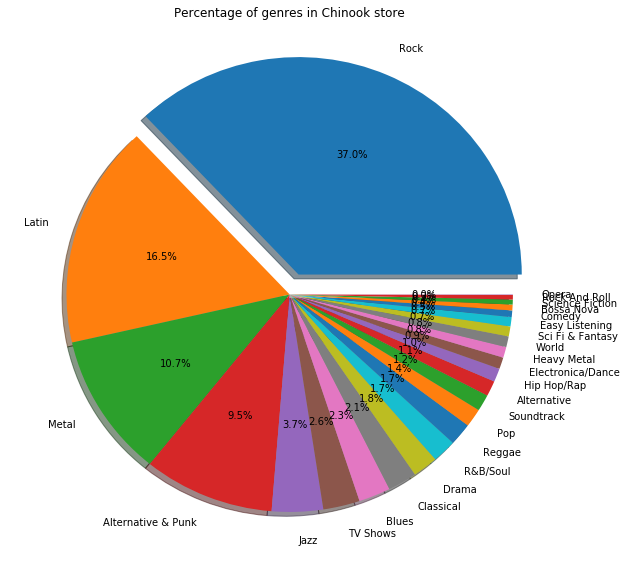

In [123]:
#CALCULATING THE PERCENTAGES OF GENRES IN OUR STORE

query12="select count(track_id) as num_of_tracks, gn.name from track as tr inner join genre as gn on gn.genre_id=tr.genre_id group by 2"
prova2=pd.read_sql_query(query12,conn)
prova2['percentage']=round((prova2['num_of_tracks']/prova2['num_of_tracks'].sum())*100,2)
prova2=prova2.sort_values('percentage', ascending=False)
prova2

fig=plt.figure(figsize=(10,10))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
ax=fig.add_subplot(1,1,1)
ax.pie(prova2['percentage'],labels=prova2['name'],labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
ax.set_title('Percentage of genres in Chinook store')
plt.show()

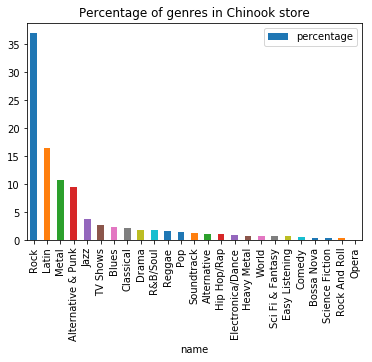

In [121]:
prova2.plot.bar(x='name',y='percentage',title='Percentage of genres in Chinook store')
plt.show()

So remembering the first bar and pie charts which showed us that the most sold genre were Rock (55%), Metal (13%) and Alternative (10%); we can now affirm, analyzing the sales' datas (look at the bar and pie charts above), that the range of tracks in our store just partially reflects the selling trend. In our store, infact, the most present genre is again Rock but just with the 33% while Metal and Alternative are respectively third and fourth with percentages comparable to the selling ones (resp 10 and 9%). The second place in the presence chart is occupied by Latin music with the 16.5%. Considering that the Latin sellings are pretty low (just 3.5%) our suggestion would be to substantially decrease the offer of Latin music and enrich by 50% the Rock offer so that the client would have a wider choice and hopefully the selling would increase too. The Metal and Alternative offer seems to be adequate to the market.

In [94]:
#CALCULATING HOW MANY OF THE TRACKS PRESENT IN THE DATABASE, HAVE BEEN PURCHASED

query13="select count(distinct(il.track_id)) as tracks_sold, count(distinct(tr.track_id)) as tot_tracks, round((cast(count(distinct(il.track_id)) as float)/cast(count(distinct(tr.track_id)) as float))*100,2) as percentage from invoice_line as il inner join track as tr on tr.track_id=il.track_id"
purch=pd.read_sql_query(query13,conn)
purch.head()

,tracks_sold,tot_tracks,percentage
0,1806,1806,100.0


As it is visible from the Dataframe above, all of the tracks present in the Chinook database have been purchased at least once.

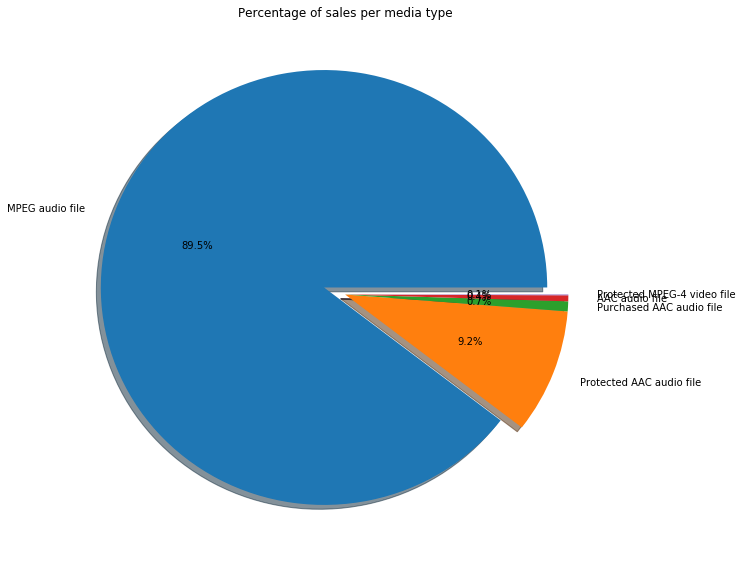

In [111]:
#CALCULATING HOW THE MEDIA TYPE GENRE WOULD INFLUENCE THE SALE (PROTECTED VS. UNPROTECTED)

query14="select sum(il.quantity) as quantity_sold, mt.media_type_id, mt.name from invoice_line as il inner join track as tr on tr.track_id=il.track_id inner join media_type as mt on mt.media_type_id=tr.media_type_id group by 3"
protected=pd.read_sql_query(query14,conn)
protected['percentage_of_selling']=round((protected['quantity_sold']/protected['quantity_sold'].sum())*100,2)
protected=protected.sort_values('percentage_of_selling', ascending=False)
protected

fig=plt.figure(figsize=(10,10))
explode = (0.1, 0, 0, 0, 0)
ax=fig.add_subplot(1,1,1)
ax.pie(protected['percentage_of_selling'],labels=protected['name'],labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
ax.set_title('Percentage of sales per media type')
plt.show()

Well, considering all the tracks sold on Chinook (4757), apparently the vast majority of them (4315, 90.7%) belongs to an unprotected media type (MPEG audio file (89.5%), AAC audio file (0.4%) and Purchased AAC audio file (0.7%)) while summing up all the different protected media types (Protected AAC audio file and Protected MPEG-4 video file), the number of tracks sold is inferior to 10% (~9.3%). It appears clear, then, that the store should privilege acquiring tracks whose media type is obviously unprotected because customers tend to highly pr